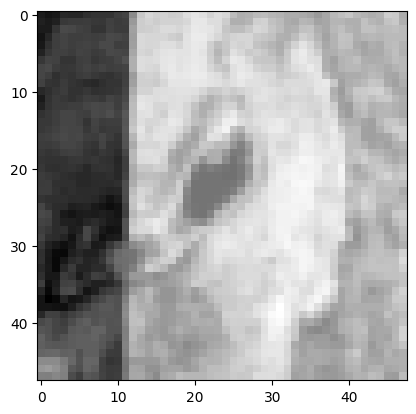

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load data
inputFile = open('/content/biomas.obj', 'rb')
data = pickle.load(inputFile)

processed_images = data['Images']
labels = data['Labels']

# Plot one image
plt.imshow(processed_images[200], cmap='gray')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convertir a un arreglo de NumPy
processed_images = np.array(processed_images)

# Normalizar las imágenes dividiendo por 255 (valor máximo de un pixel)
processed_images = processed_images / 255.0

# Convertir etiquetas a formato one-hot
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)


In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

kf = KFold(n_splits=2, shuffle=True, random_state=42)
processed_images = processed_images.reshape((processed_images.shape[0], processed_images.shape[1], processed_images.shape[2], 1))
accuracies = []

for train_index, test_index in kf.split(processed_images):
    X_train, X_test = processed_images[train_index], processed_images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(processed_images.shape[1], processed_images.shape[2], 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    score = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(score[1])
    print(f'Accuracy for fold: {score[1]}')

print(f'Mean Accuracy: {np.mean(accuracies)}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.1884 - loss: 1.7442
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.4211 - loss: 1.3717
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.5712 - loss: 1.1159
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6108 - loss: 1.0306
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6657 - loss: 0.9157
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6666 - loss: 0.8919
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6841 - loss: 0.8020
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7102 - loss: 0.7581
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.7463 - loss: 0.6914
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7074 - loss: 0.7703
Accuracy for fold: 0.6121031641960144
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.2188 - loss: 1.7082
Epoch 2/10
32/32 ━━━━━━━━━━━━━━